In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
#import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
#from pylab import rcParams
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

C:\Users\AnggiDast\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\AnggiDast\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\AnggiDast\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will b

In [2]:
df = pd.read_excel ('dataset2.xlsx')
df

,Unnamed: 0,hardness,tensile,elongation,sg,bursting,crack
0,0,70,124,427,1.24,2.29,No crack
1,1,71,134,483,1.25,2.46,No crack
2,2,69,117,406,1.25,2.26,No crack
3,3,71,114,408,1.26,2.31,No crack
4,4,69,117,384,1.24,2.29,No crack
...,...,...,...,...,...,...,...
959,959,70,109,375,1.27,2.16,No crack
960,960,70,110,437,1.26,2.28,No crack
961,961,73,106,338,1.27,2.10,Crack
962,962,71,119,434,1.28,2.27,No crack


In [3]:
X = df.iloc[:, -1].values

In [4]:
lec_X = LabelEncoder()
X = lec_X.fit_transform(X)

In [5]:
y = pd.DataFrame(X)

In [6]:
y.columns = ['cr']

In [7]:
y

,cr
0,1
1,1
2,1
3,1
4,1
...,...
959,1
960,1
961,0
962,1


In [8]:
df2 = pd.concat((df, y), axis=1)
df2

,Unnamed: 0,hardness,tensile,elongation,sg,bursting,crack,cr
0,0,70,124,427,1.24,2.29,No crack,1
1,1,71,134,483,1.25,2.46,No crack,1
2,2,69,117,406,1.25,2.26,No crack,1
3,3,71,114,408,1.26,2.31,No crack,1
4,4,69,117,384,1.24,2.29,No crack,1
...,...,...,...,...,...,...,...,...
959,959,70,109,375,1.27,2.16,No crack,1
960,960,70,110,437,1.26,2.28,No crack,1
961,961,73,106,338,1.27,2.10,Crack,0
962,962,71,119,434,1.28,2.27,No crack,1


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df2[['elongation']],df2.cr,test_size=0.3)

In [10]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [11]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [12]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'), y_train)

C:\Users\AnggiDast\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [13]:
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_train_smote))

Before SMOTE:  Counter({1: 612, 0: 62})
After SMOTE:  Counter({1: 612, 0: 612})


In [14]:
model.fit(X_train_smote, y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict))
pd.crosstab(y_test, y_predict)

0.9241379310344827


col_0,0,1
cr,,
0,16,3
1,19,252


In [15]:
print(y_predict)

[1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1
 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1]


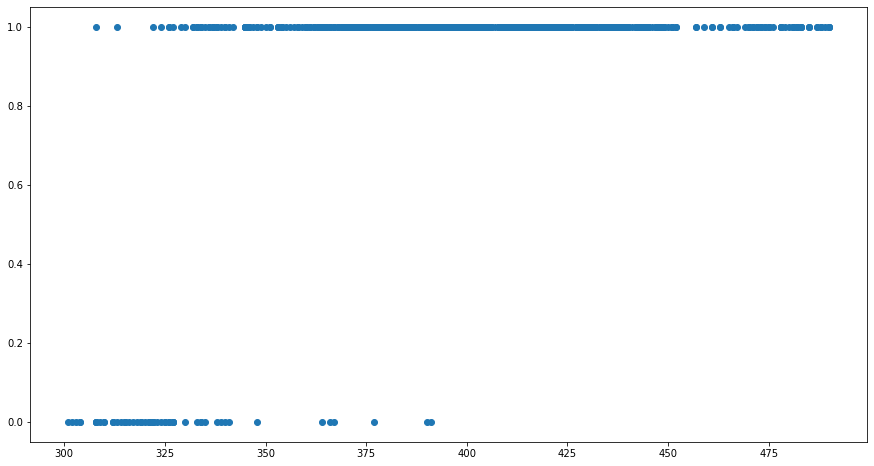

In [16]:
plt.figure(figsize=(15,8))
plt.scatter(X_train, y_train)
#plt.plot(X_train, model.predict(X_train), color = 'red')
#plt.title('Elongation to Bursting (Train Set)')
#plt.xlabel("Elongation at Break")
#plt.ylabel("Bursting Pressure")
plt.show()

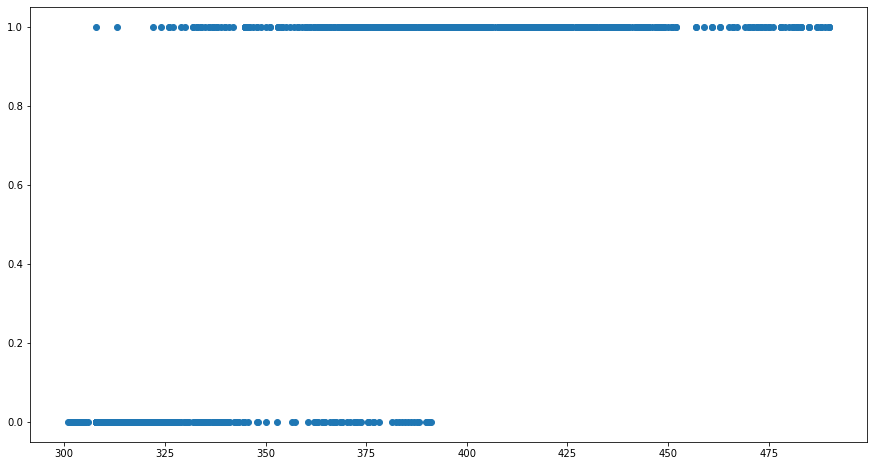

In [17]:
plt.figure(figsize=(15,8))
plt.scatter(X_train_smote, y_train_smote)
#plt.plot(X_train, model.predict(X_train), color = 'red')
#plt.title('Elongation to Bursting (Train Set)')
#plt.xlabel("Elongation at Break")
#plt.ylabel("Bursting Pressure")
plt.show()

In [18]:
target = 'cr'

1    883
0     81
Name: cr, dtype: int64


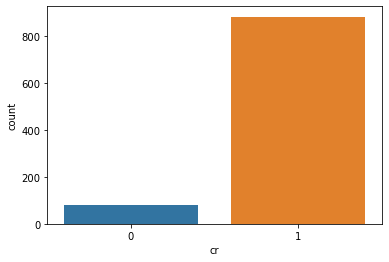

In [19]:
ax = sns.countplot(x=target, data=df2)
print(df2[target].value_counts())

In [20]:
y_pred = model.predict(X_train_smote)

In [21]:
#Accuracy score
print("The Training (Before SMOTE) Accuracy is: ", model.score(X_train, y_train))
print("The Training (After SMOTE) Accuracy is: ", model.score(X_train_smote, y_train_smote))
print("The Testing Accuracy is: ", model.score(X_test, y_test))

#Classification report
print(classification_report(y_train_smote, y_pred))

The Training (Before SMOTE) Accuracy is:  0.9065281899109793
The Training (After SMOTE) Accuracy is:  0.9125816993464052
The Testing Accuracy is:  0.9241379310344827
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       612
           1       0.92      0.91      0.91       612

    accuracy                           0.91      1224
   macro avg       0.91      0.91      0.91      1224
weighted avg       0.91      0.91      0.91      1224



In [22]:
#Confusion matrix
def plot_confusion_matrix(cm, classes=None, title='Confusion Matrix'):
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True value')
    plt.xlabel('Predicted value')

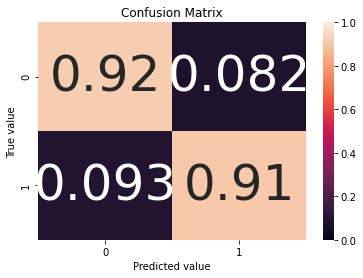

In [23]:
#Visualize cm
cm = confusion_matrix(y_train_smote, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
cm

plot_confusion_matrix(cm_norm, classes = model.classes_, title='Confusion Matrix')

In [24]:
model.classes_

array([0, 1])

In [25]:
cm.sum(axis=0)

array([619, 605], dtype=int64)

In [26]:
cm.sum(axis=1)

array([612, 612], dtype=int64)

In [27]:
#True value of cm
cm_norm

array([[0.91830065, 0.08169935],
       [0.09313725, 0.90686275]])

In [28]:
cm

array([[562,  50],
       [ 57, 555]], dtype=int64)

In [29]:
np.diag(cm)

array([562, 555], dtype=int64)

In [30]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.91830065 0.90686275]
The Precision is: [0.90791599 0.91735537]
The False positive rate is: [0.09313725 0.08169935]
The False Negative Rate is:  [0.08169935 0.09313725]

The average TPR is: 0.9125816993464052
The average Precision is: 0.9126356827193955
The average False positive rate is: 0.08741830065359477
The average False Negative Rate is: 0.08741830065359477


In [31]:
pred_proba = model.predict_proba(X_train_smote)
model.coef_

array([[0.08444969]])

In [32]:
# Running Log loss on training
print("The Log Loss on Training Dataset is: ", log_loss(y_train_smote, pred_proba))

# Running Log loss on testing
pred_proba_t = model.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training Dataset is:  0.214169009551508
The Log Loss on Testing Dataset is:  0.1996184860443091


In [33]:
np.geomspace(1e-5, 1e5, num=20)

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

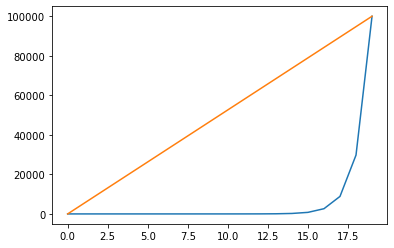

In [34]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

In [35]:
# Looping over the parameters
C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []


for c in C_List:
    model2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    model2.fit(X_train_smote, y_train_smote)
    score = model2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = model2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

The CA of C parameter 1e-05 is 0.906896551724138:
The Logg Loss of C parameter 1e-05 is 0.27464585106938333:

The CA of C parameter 3.359818286283781e-05 is 0.9137931034482759:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.22817197516088686:

The CA of C parameter 0.00011288378916846884 is 0.9241379310344827:
The Logg Loss of C parameter 0.00011288378916846884 is 0.20876876102421646:

The CA of C parameter 0.000379269019073225 is 0.9241379310344827:
The Logg Loss of C parameter 0.000379269019073225 is 0.20232923875209116:

The CA of C parameter 0.0012742749857031334 is 0.9241379310344827:
The Logg Loss of C parameter 0.0012742749857031334 is 0.2004152471065675:

The CA of C parameter 0.004281332398719391 is 0.9241379310344827:
The Logg Loss of C parameter 0.004281332398719391 is 0.1998536859726786:

The CA of C parameter 0.01438449888287663 is 0.9241379310344827:
The Logg Loss of C parameter 0.01438449888287663 is 0.19968765841180758:

The CA of C parameter 0.0483293023857175

In [37]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,19,100000.000000,0.924138,0.199617
1,18,29763.514416,0.924138,0.199617
2,17,8858.667904,0.924138,0.199617
3,16,2636.650899,0.924138,0.199617
4,15,784.759970,0.924138,0.199617
5,14,233.572147,0.924138,0.199617
6,13,69.519280,0.924138,0.199617
7,12,20.691381,0.924138,0.199618
8,11,6.158482,0.924138,0.199618
9,10,1.832981,0.924138,0.199618


In [36]:
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
model3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
model3.fit(X_train_smote, y_train_smote)
print("The CA is:", model3.score(X_test, y_test))
pred_proba_t = model3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", model3.C_)

The CA is: 0.9241379310344827
The Logistic Loss is:  0.19983828517599458
The optimal C parameter is:  [0.00428133]


The CA of C parameter 1e-05 is 0.906896551724138:
The Logg Loss of C parameter 1e-05 is 0.27464585106938333:



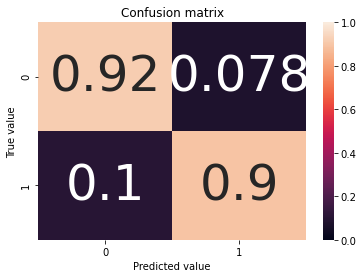

The CA of C parameter 3.359818286283781e-05 is 0.9137931034482759:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.22817197516088686:



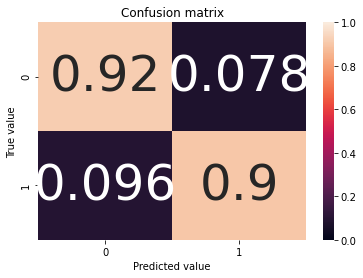

The CA of C parameter 0.00011288378916846884 is 0.9241379310344827:
The Logg Loss of C parameter 0.00011288378916846884 is 0.20876876102421646:



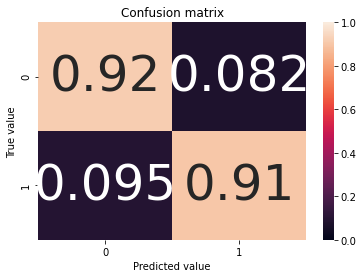

The CA of C parameter 0.000379269019073225 is 0.9241379310344827:
The Logg Loss of C parameter 0.000379269019073225 is 0.20232923875209116:



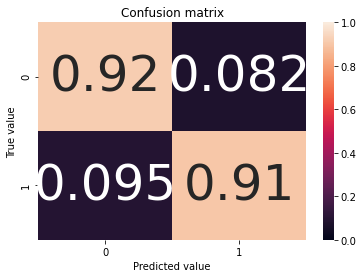

The CA of C parameter 0.0012742749857031334 is 0.9241379310344827:
The Logg Loss of C parameter 0.0012742749857031334 is 0.2004152471065675:



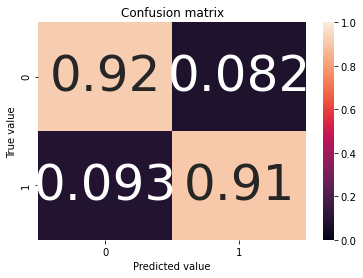

The CA of C parameter 0.004281332398719391 is 0.9241379310344827:
The Logg Loss of C parameter 0.004281332398719391 is 0.1998536859726786:



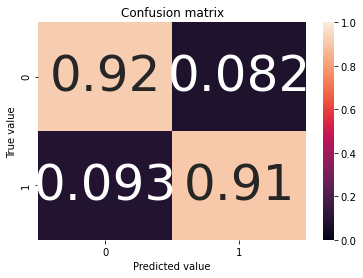

The CA of C parameter 0.01438449888287663 is 0.9241379310344827:
The Logg Loss of C parameter 0.01438449888287663 is 0.19968765841180758:



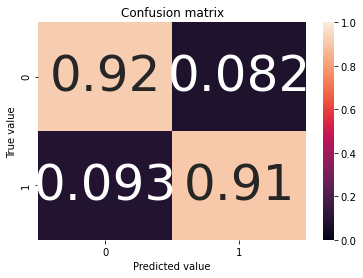

The CA of C parameter 0.04832930238571752 is 0.9241379310344827:
The Logg Loss of C parameter 0.04832930238571752 is 0.1996383543928964:



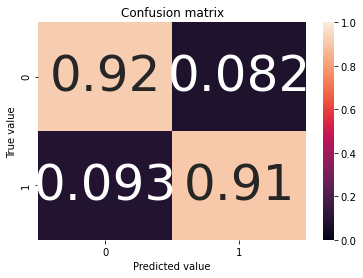

The CA of C parameter 0.1623776739188721 is 0.9241379310344827:
The Logg Loss of C parameter 0.1623776739188721 is 0.19962369004166658:



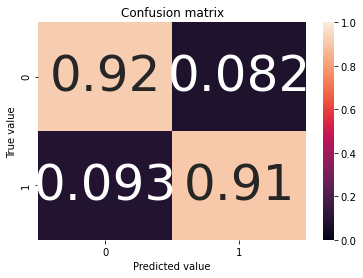

The CA of C parameter 0.5455594781168515 is 0.9241379310344827:
The Logg Loss of C parameter 0.5455594781168515 is 0.19961932633401955:



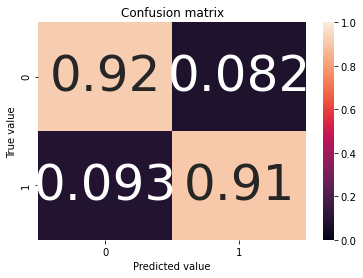

The CA of C parameter 1.8329807108324339 is 0.9241379310344827:
The Logg Loss of C parameter 1.8329807108324339 is 0.19961802762290884:



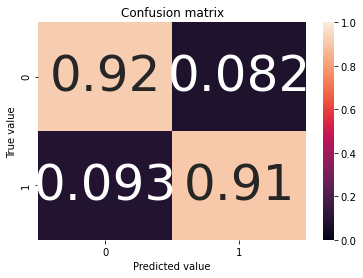

The CA of C parameter 6.1584821106602545 is 0.9241379310344827:
The Logg Loss of C parameter 6.1584821106602545 is 0.1996176410880803:



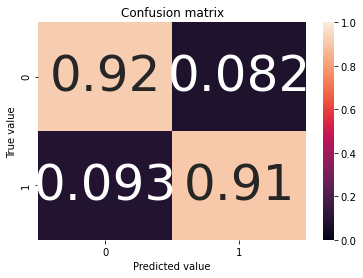

The CA of C parameter 20.6913808111479 is 0.9241379310344827:
The Logg Loss of C parameter 20.6913808111479 is 0.19961752604237232:



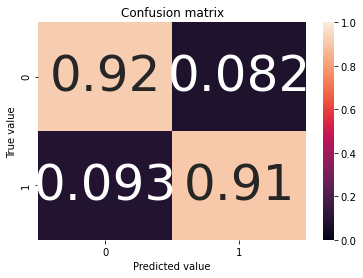

The CA of C parameter 69.51927961775606 is 0.9241379310344827:
The Logg Loss of C parameter 69.51927961775606 is 0.19961749180078323:



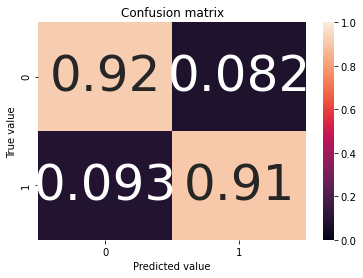

The CA of C parameter 233.57214690901213 is 0.9241379310344827:
The Logg Loss of C parameter 233.57214690901213 is 0.19961748160928788:



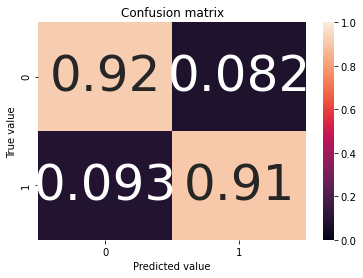

The CA of C parameter 784.7599703514607 is 0.9241379310344827:
The Logg Loss of C parameter 784.7599703514607 is 0.19961747857594087:



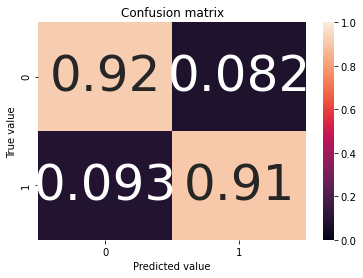

The CA of C parameter 2636.6508987303555 is 0.9241379310344827:
The Logg Loss of C parameter 2636.6508987303555 is 0.1996174776731107:



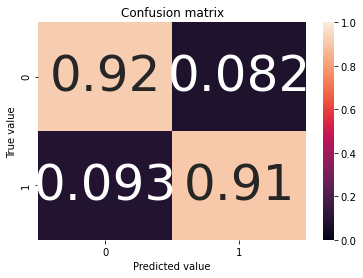

The CA of C parameter 8858.667904100832 is 0.9241379310344827:
The Logg Loss of C parameter 8858.667904100832 is 0.19961747740439642:



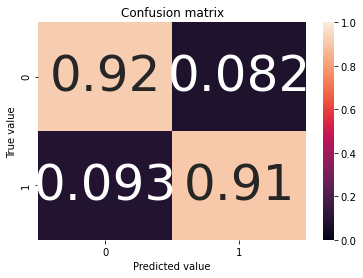

The CA of C parameter 29763.51441631313 is 0.9241379310344827:
The Logg Loss of C parameter 29763.51441631313 is 0.19961747732441792:



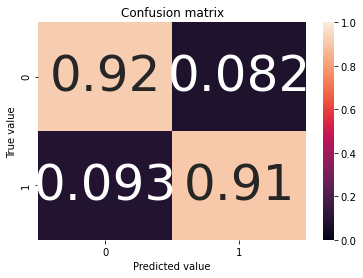

The CA of C parameter 100000.0 is 0.9241379310344827:
The Logg Loss of C parameter 100000.0 is 0.19961747730061344:



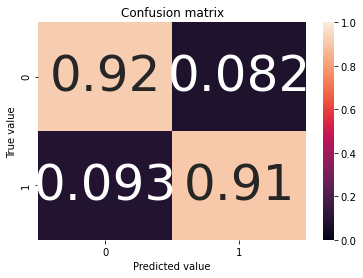

In [39]:
# K-fold Cross Validation
# Maybe we have a different metric we want to track

# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    model2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    model2.fit(X_train_smote, y_train_smote)
    score = model2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = model2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")
    
    y_pred2 = model2.predict(X_train_smote)
    cm = confusion_matrix(y_train_smote, y_pred2)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    plot_confusion_matrix(cm_norm, classes = model.classes_, title='Confusion matrix')
    plt.show()

In [40]:
# Training a Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_smote, y_train_smote)
score = dummy_clf.score(X_test, y_test)

pred_proba_t = dummy_clf.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

Testing Acc: 0.06551724137931035
Log Loss: 32.27589104489929


In [59]:
model.predict([[360], [370]])

array([1, 1])

In [ ]:
# Hold-out validation

# first one
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

In [ ]:
# Final Model 

model3 = LogisticRegression(random_state=10, solver = 'lbfgs', C=784.759970)
model3.fit(X_train_smote, y_train_smote)
score = log_reg3.score(X_valid, y_valid)

pred_proba_t = log_reg3.predict_proba(X_valid)
log_loss2 = log_loss(y_valid, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

NameError: name 'expit' is not defined

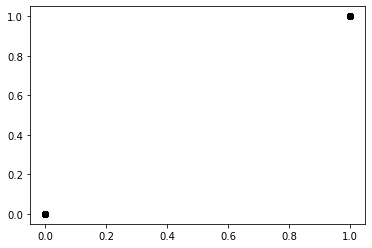

In [40]:
#plt.figure(1, figsize=(4, 3))
#plt.model()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * model.coef_ + model.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

#ols = linear_model.LinearRegression()
#ols.fit(X, y)
#plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
#plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()